In [ ]:
#####################################################################################################

Found 978 images belonging to 2 classes.
Found 282 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


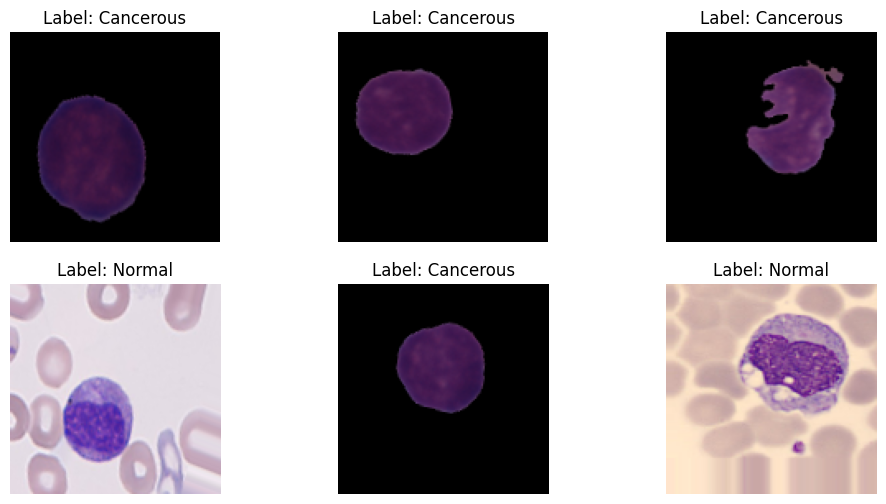

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732783074.934172     171 service.cc:145] XLA service 0x7c2a180049e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732783074.934237     171 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/31 ━━━━━━━━━━━━━━━━━━━━ 3:55 8s/step - accuracy: 0.5312 - loss: 0.6735

I0000 00:00:1732783079.097524     171 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.8949 - loss: 0.1881 - val_accuracy: 1.0000 - val_loss: 5.2417e-20
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 1.0000 - loss: 1.7970e-10 - val_accuracy: 1.0000 - val_loss: 2.3468e-18
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 1.0000 - loss: 1.2394e-08 - val_accuracy: 1.0000 - val_loss: 2.5831e-18
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 1.0000 - loss: 3.4726e-11 - val_accuracy: 1.0000 - val_loss: 2.5937e-18
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 1.0000 - loss: 4.5073e-11 - val_accuracy: 1.0000 - val_loss: 2.5940e-18
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 1.0000 - loss: 8.6073e-12 - val_accuracy: 1.0000 - val_loss: 2.5940e-18
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 1.0000 - loss: 8.3456e-20
Test Loss: 6.1063e-20
Test Accuracy: 100.00%


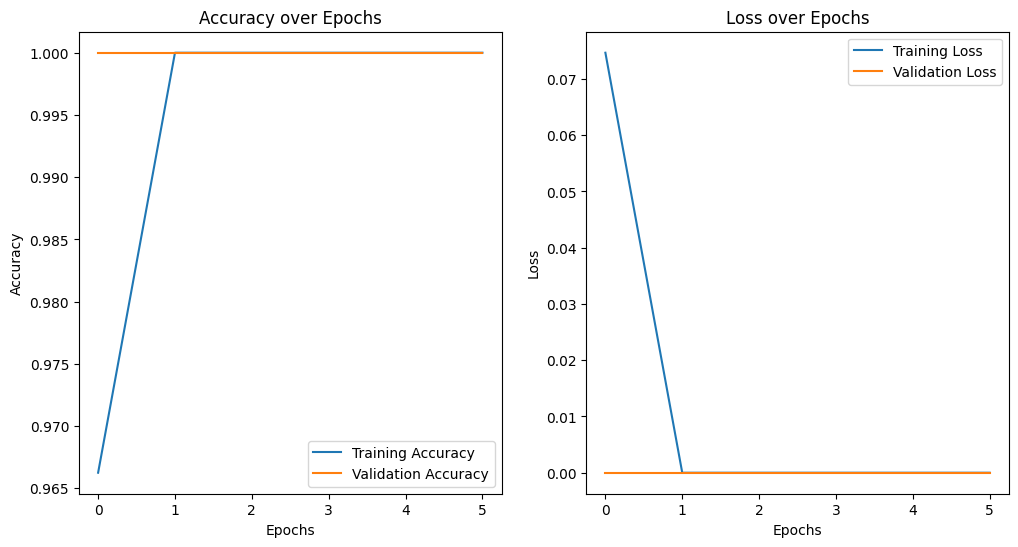

In [3]:
# Import required librar
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Load the Dataset

# Define paths
train_dir = '/kaggle/input/blood-cancer/train'
val_dir = '/kaggle/input/blood-cancer/val'
test_dir = '/kaggle/input/blood-cancer/test'

# ImageDataGenerator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test (no augmentation, only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Step 2: Visualize a Batch of Training Data
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {'Normal' if y_batch[i] == 1 else 'Cancerous'}")
    plt.axis('off')
plt.show()

# Step 3: Define and Compile the Model
model =l([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Set Up Callbacks
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=False
)

# Step 5: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)

# Step 6: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4e}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Step 7: Visualize Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


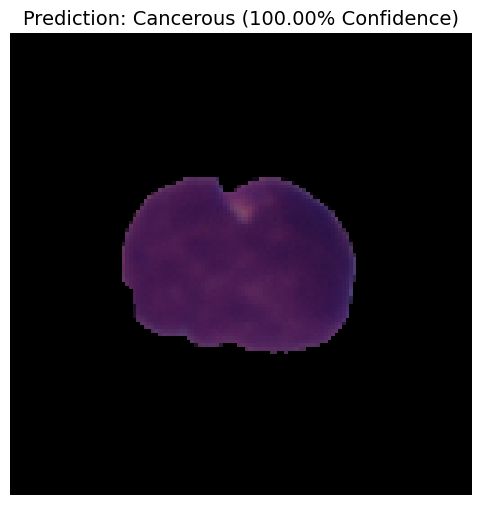

Predicted Label: Cancerous
Confidence: 100.00%


In [8]:
# Import the necessary libraries for testing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  # Import to load your trained model

# Step 8: Test on a Single Unseen Image
def predict_and_visualize_image(model, image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))  # Resize image to match model's input size
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get prediction
    prediction = model.predict(img_array)[0][0]
    predicted_label = 'Normal' if prediction > 0.5 else 'Cancerous'
    confidence = prediction if prediction > 0.5 else 1 - prediction

    
    # Display the image along with prediction and confidence
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence*100:.2f}% Confidence)", fontsize=14)
    plt.show()

    return predicted_label, confidence

# Step 9: Load the trained model (best_model.keras) and test on an unseen image
model = load_model('best_model.keras')  # Load the model that was saved during training

image_path = '/kaggle/input/blood-cancer/test/cancerous_cells/UID_14_2_3_all.bmp'  # Path to an unseen test image
predicted_label, confidence = predict_and_visualize_image(model, image_path)

# Print the prediction result
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence*100:.2f}%")
